In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lecture 05

## Exercise 05.1

We want to estimate the expectation value for the distance from the origin $\left\langle r \right\rangle$ of the electron in a hydrogen atom, both in the ground state 1s $\Psi_{1,0,0}$ and in the excited state 2p $\Psi_{2,1,0}$. To do so, we can use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ in Cartesian coordinates. We will use both an uniform transition probability $T(\vec{x}|\vec{y})$ and a gaussian one. The sampled positions can be used to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and we expect the following results:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
where $a_0$ is the Bohr's radius.

The first thing to do in order to use the Metropolis algorithm is to find the right values of $\delta$ and $\sigma$ such that the acceptance rate is about $50\%$. After some testing, the chosen values are $\delta_{1,0,0}=1.25$, $\delta_{2,1,0}=3$ for uniform sampling and $\sigma_{1,0,0}=0.75$, $\sigma_{2,1,0}=1.85$ for gaussian sampling.

The next step is making sure that the system is close to equilibrium, meaning that the starting point is already in a high probability region of the space (i.e. relatively close to the origin). We can visualize what happens if we start from a point far away in the following graphs, where the starting point is chosen to be $(20,20,20)$.

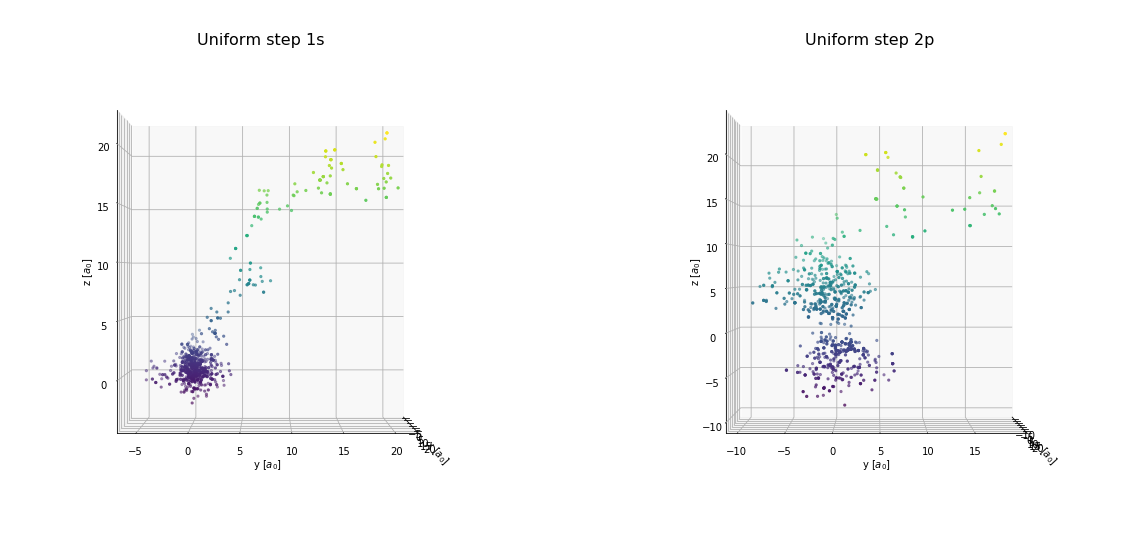

In [2]:
X,Y,Z=np.loadtxt( "data/EQ20points100.out", usecols=(0,1,2), delimiter=' ', unpack='true' )
X2,Y2,Z2=np.loadtxt( "data/EQ20points210.out", usecols=(0,1,2), delimiter=' ', unpack='true' )

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x [$a_0$]')
ax.set_ylabel('y [$a_0$]')
ax.set_zlabel('z [$a_0$]')
ax.set_title("Uniform step 1s", size=16)
ax.view_init(0, 0)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax.set_xlabel('x [$a_0$]')
ax.set_ylabel('y [$a_0$]')
ax.set_zlabel('z [$a_0$]')
ax.set_title("Uniform step 2p", size=16)
ax.view_init(0, 0)
plt.show()

Here we can see all $10^3$ points of the simulation. It is clear how the system evolves toward a state of equilibrium starting from $(20,20,20)$.

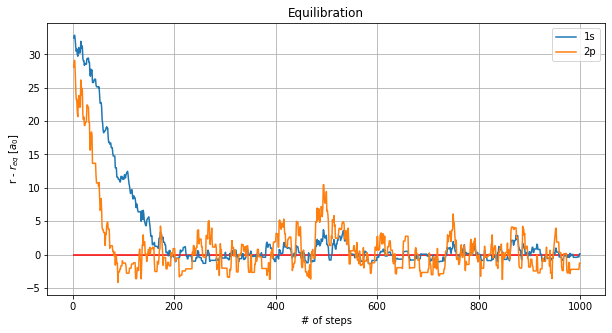

In [3]:
x, y = np.loadtxt( "data/EQ20values100.out", usecols=(0,1), delimiter=' ', unpack='true' )
x2, y2 = np.loadtxt( "data/EQ20values210.out", usecols=(0,1), delimiter=' ', unpack='true' )

plt.figure(figsize=(10,5))
plt.hlines(0,0,len(x), color='red')
plt.errorbar(x,y-1.5,label='1s')
plt.errorbar(x2,y2-5,label='2p')
plt.title('Equilibration')
plt.xlabel('# of steps')
plt.ylabel("r - $r_{eq}$ [$a_0$]")
plt.legend()
plt.grid(True)

plt.show()

Plotting the distance from the origin of the same set of points, we can observe how 1s requires about $200$ steps to reach equilibrium starting from $(20,20,20)$, while 2p around half of that. This difference is probably caused by the fact that the equilibrium state of 1s is more concentrated near the origin than that of 2p.

Now that we know that $10^3$ steps are plenty enough to equilibrate the system, we want to check how many steps should the blocks contain. To do so, we can compute the autocorrelation of a set of $10^5$ instantaneous values of the radius obtained with uniform sampling of 1s.

This will take about 20 seconds...


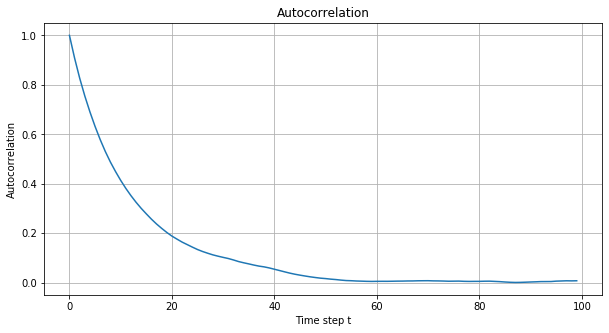

In [4]:
print("This will take about 20 seconds...")

r = np.loadtxt('data/autocorr100.out', usecols=(1))
autocorr = []
for tau in range(100):
    l = len(r) - tau
    r_t = 0
    r_tau = 0
    r_ttau = 0
    r_t2 = 0
    for t in range(l):
        r_t += r[t]
        r_tau += r[t+tau]
        r_ttau += r[t]*r[t+tau]
        r_t2 += r[t]**2
    r_t /= l
    r_tau /= l
    r_ttau /= l
    r_t2 /= l
    autocorr.append((r_ttau-r_t*r_tau)/(r_t2-r_t**2))

plt.figure(figsize = (10,5))    
plt.plot(range(len(autocorr)),autocorr)
plt.title('Autocorrelation')
plt.xlabel('Time step t')
plt.ylabel("Autocorrelation")
plt.grid()
plt.show()

The autocorrelation is already low enough at $100$ steps per block. Since the simulation does not take much time and we can use many steps, we will use blocks of length $10^4$ anyway, much more than what is required.

We are ready to procede, so we compute $\langle r \rangle$ with $10^6$ steps divided in $100$ blocks. The starting point for the 1s state will be $(0,0,0)$, while for the 2p state we will use $(1,1,1)$. We will also do $10^3$ steps of equilibration, but that should not be required since we are already close to an high probability region.

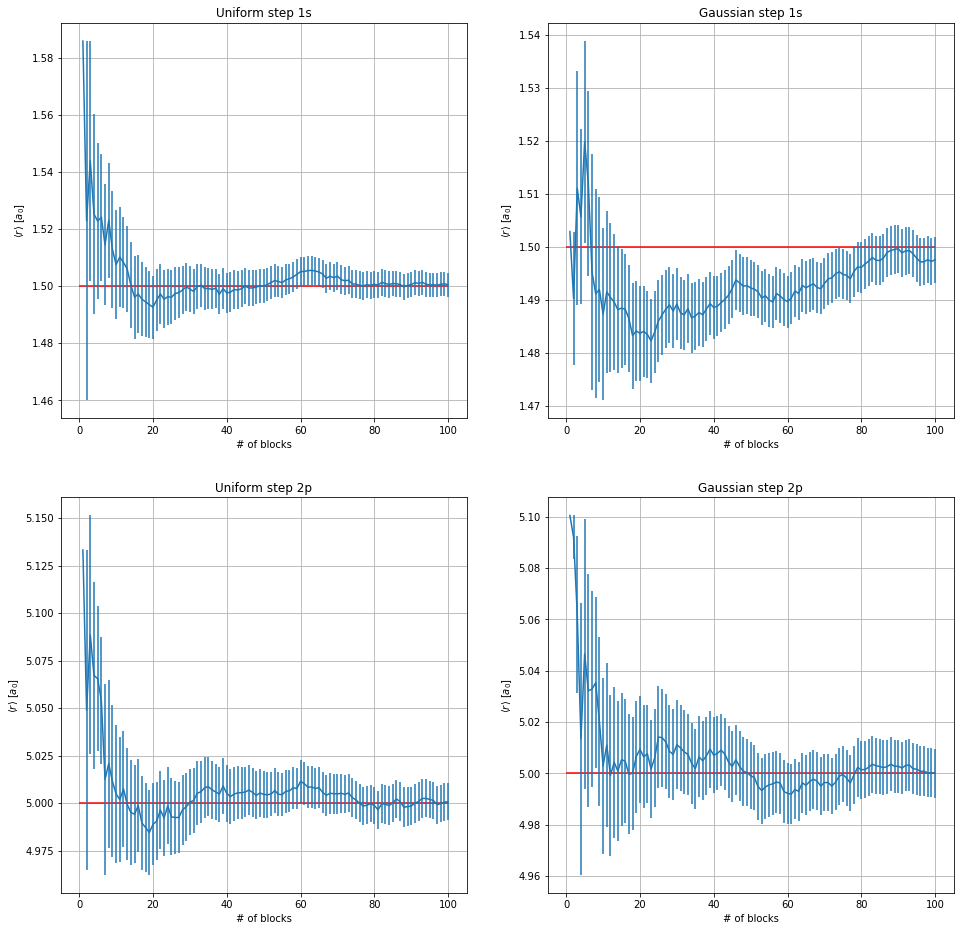

On the last block of the 1s state (uniform):
estimate: 1.50046 error: 0.00412322
On the last block of the 1s state (gaussian):
estimate: 1.49758 error: 0.00435268
On the last block of the 2p state (uniform):
estimate: 5.00065 error: 0.00973652
On the last block of the 2p state (gaussian):
estimate: 5.0 error: 0.00943772


In [5]:
x, y, error=np.loadtxt("mean100.out", usecols=(0,1,2), delimiter=" ", unpack='true')
xG, yG, errorG=np.loadtxt("mean100Gauss.out", usecols=(0,1,2), delimiter=" ", unpack='true')
x2, y2, error2=np.loadtxt("mean210.out", usecols=(0,1,2), delimiter=" ", unpack='true')
x2G, y2G, error2G=np.loadtxt("mean210Gauss.out", usecols=(0,1,2), delimiter=" ", unpack='true')
fig = plt.figure(figsize=(16,16))

plt.subplot(221)
plt.hlines(1.5,0,len(x), color='red')
plt.errorbar(x,y,yerr=error)
plt.title('Uniform step 1s')
plt.xlabel('# of blocks')
plt.ylabel(r'$\langle r \rangle $ [$a_0$]')
plt.grid(True)

plt.subplot(222)
plt.hlines(1.5,0,len(xG), color='red')
plt.errorbar(xG,yG,yerr=errorG)
plt.title('Gaussian step 1s')
plt.xlabel('# of blocks')
plt.ylabel(r'$\langle r \rangle $ [$a_0$]')
plt.grid(True)

plt.subplot(223)
plt.hlines(5,0,len(x2), color='red')
plt.errorbar(x2,y2,yerr=error2)
plt.title('Uniform step 2p')
plt.xlabel('# of blocks')
plt.ylabel(r'$\langle r \rangle $ [$a_0$]')
plt.grid(True)

plt.subplot(224)
plt.hlines(5,0,len(x2G), color='red')
plt.errorbar(x2G,y2G,yerr=error2G)
plt.title('Gaussian step 2p')
plt.xlabel('# of blocks')
plt.ylabel(r'$\langle r \rangle $ [$a_0$]')
plt.grid(True)

plt.show()

print("On the last block of the 1s state (uniform):")
print("estimate:",y[99],"error:",error[99])
print("On the last block of the 1s state (gaussian):")
print("estimate:",yG[99],"error:",errorG[99])
print("On the last block of the 2p state (uniform):")
print("estimate:",y2[99],"error:",error2[99])
print("On the last block of the 2p state (gaussian):")
print("estimate:",y2G[99],"error:",error2G[99])

All the graphs show that the estimated values are compatible with what we expected within statistical error. There is no significative difference between uniform and gaussian sampling.

In the following graph we can visualize the distribution of the points (one point every 100 steps).

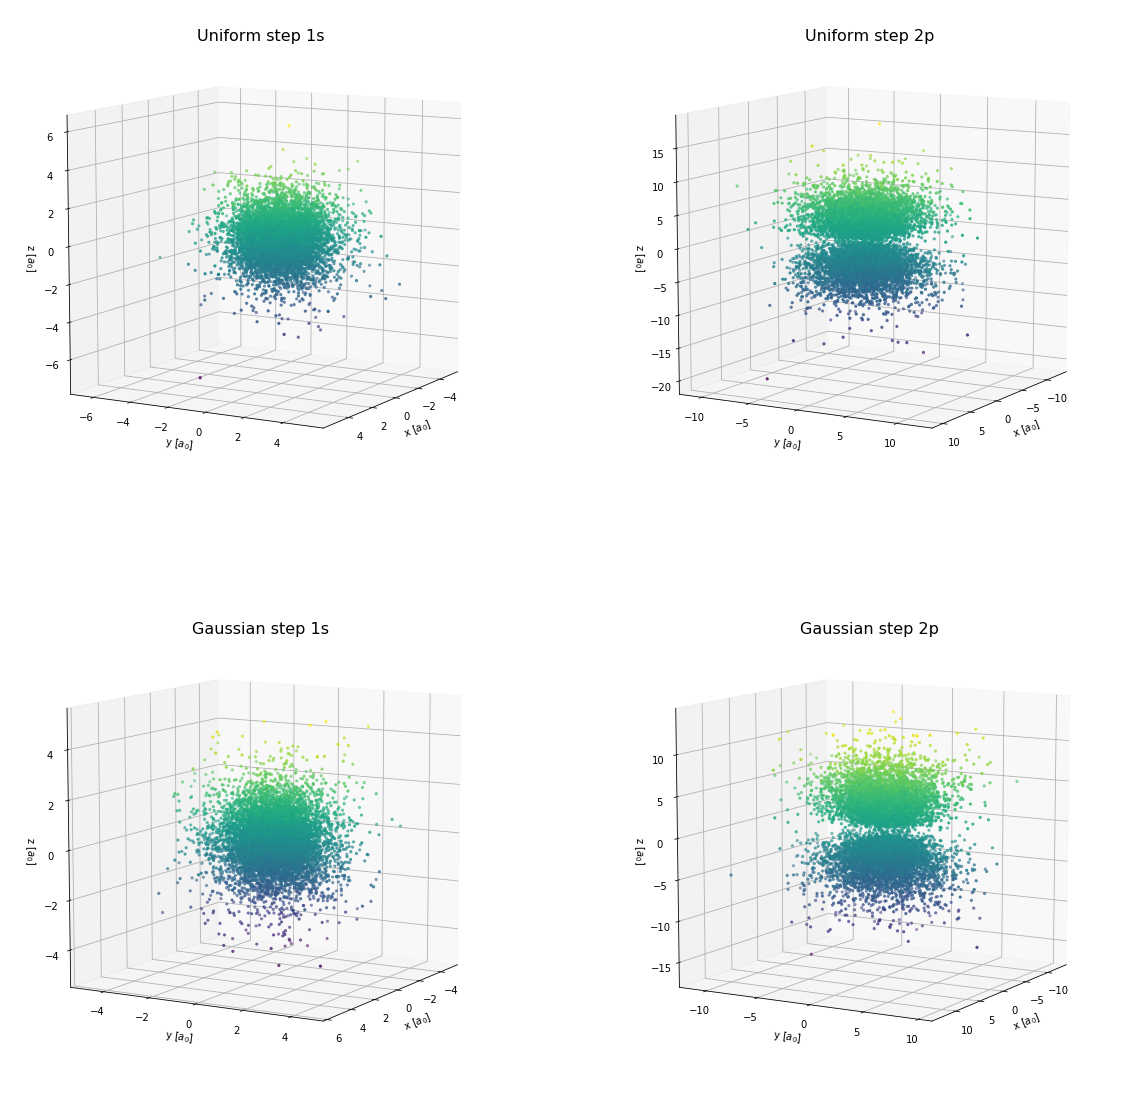

In [6]:
X,Y,Z=np.loadtxt( "points100.out", usecols=(0,1,2), delimiter=' ', unpack='true' )
X2,Y2,Z2=np.loadtxt( "points210.out", usecols=(0,1,2), delimiter=' ', unpack='true' )
XG,YG,ZG=np.loadtxt( "points100Gauss.out", usecols=(0,1,2), delimiter=' ', unpack='true' )
X2G,Y2G,Z2G=np.loadtxt( "points210Gauss.out", usecols=(0,1,2), delimiter=' ', unpack='true' )

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x [$a_0$]')
ax.set_ylabel('y [$a_0$]')
ax.set_zlabel('z [$a_0$]')
ax.set_title("Uniform step 1s", size=16)
ax.view_init(10, 30)
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax.set_xlabel('x [$a_0$]')
ax.set_ylabel('y [$a_0$]')
ax.set_zlabel('z [$a_0$]')
ax.set_title("Uniform step 2p", size=16)
ax.view_init(10, 30)
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(XG, YG, ZG, c=ZG, marker='.')
ax.set_xlabel('x [$a_0$]')
ax.set_ylabel('y [$a_0$]')
ax.set_zlabel('z [$a_0$]')
ax.set_title("Gaussian step 1s", size=16)
ax.view_init(10, 30)
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(X2G, Y2G, Z2G, c=Z2G, marker='.')
ax.set_xlabel('x [$a_0$]')
ax.set_ylabel('y [$a_0$]')
ax.set_zlabel('z [$a_0$]')
ax.set_title("Gaussian step 2p", size=16)
ax.view_init(10, 30)
plt.show()